# Foundational Components of Neural Networks
## Objective 01 - describe the foundational components of a neural network

### Activation Function

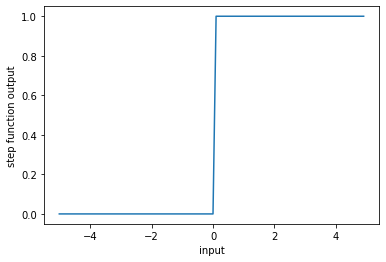

In [8]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Define the activation function
unit_step = lambda x: 0 if x < 0 else 1

# Vectorize the function (use on an array)
unit_step_v = np.vectorize(unit_step)

# Create arrays to plot
x = np.arange(-5, 5, 0.1)
y = unit_step_v(x)

# Plot
plt.plot(x, y)
plt.xlabel('input'); plt.ylabel('step function output');

# plt.clf() # comment/delete to show plot

In [9]:
# Data ('OR' gate)
# tuple format: ([x1, x2, bias], expected)
training_data = [
    (np.array([0,0,1]), 0),
    (np.array([0,1,1]), 1),
    (np.array([1,0,1]), 1),
    (np.array([1,1,1]), 1),
]

In [10]:
# Perceptron code follows the example here, with
# some modifications: 
# https://blog.dbrgn.ch/2013/3/26/perceptrons-in-python/

# Imports
#for random input selection
from random import choice 

# Weights (begin with random weights)
w = np.random.rand(3)

# Errors (store for plotting)
errors = []

# Learning rate (the size of "jumps" when updating the weights)
learn_rate = 0.2

# Number of iterations/weight updates
n = 50

# "Learning" loop
for i in range(n):

    # Select a random item from the training data
    x, expected = choice(training_data)

    # Neuron calculation (dot product of weights and input)
    result = np.dot(w, x)

    # Compare to the expected result
    error = expected - unit_step(result)
    errors.append(error)

    # Update the weights
    w += learn_rate * error * x

# Test the perceptron with the "learned" weights
for x, _ in training_data:
    result = np.dot(x, w)
    print("{}: {} -> {}".format(x[:2], result, unit_step(result)))

[0 0]: -0.09118480172102589 -> 0
[0 1]: 0.6166684694000395 -> 1
[1 0]: 0.4204778975910796 -> 1
[1 1]: 1.1283311687121451 -> 1
